In [ ]:
************Approach to the problem********************
Using the Amazon Alexa review data set, 
performed Data Analysis, 
Applied Data Cleaning steps using NLTK library applied following steps 
    *removing stop words, 
    *removing puntuation,
    *special characters, 
    *Numbers, 
    *Word Tokenization, 
    *Lemmatization.
Data Tranformation
    * TOkenization
**Results   
Applied Multinomial Naive Bayes classification to predict if the review is positive or negative.
Got Accuracy of 91percent
**Future Work
Apply various Machine learning Algorithms and do comparision between various algorithms.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('amazon_alexa.tsv', delimiter='\t')

In [4]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
data.shape

(3150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
data[data['feedback']==1].count()

rating              2893
date                2893
variation           2893
verified_reviews    2893
feedback            2893
dtype: int64

In [7]:
data[data['feedback']==0].count()

rating              257
date                257
variation           257
verified_reviews    257
feedback            257
dtype: int64

In [53]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [26]:
data.feedback.unique()

array([1, 0], dtype=int64)

In [27]:
data.variation.unique() 

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

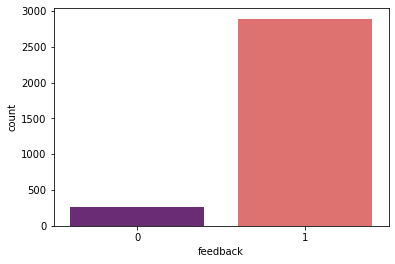

In [5]:
sns.countplot(x='feedback',data=data,palette='magma')

From the above, we can observer that most of the reviwes are positive

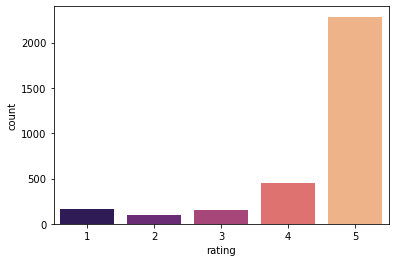

In [6]:
sns.countplot(x='rating',data=data,palette='magma')

The distribution of rating from 1 to 5 is ahown above

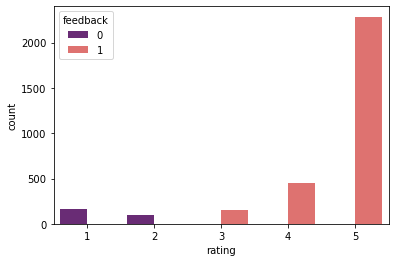

In [30]:
sns.countplot(x='rating',hue='feedback',data=data,palette='magma')

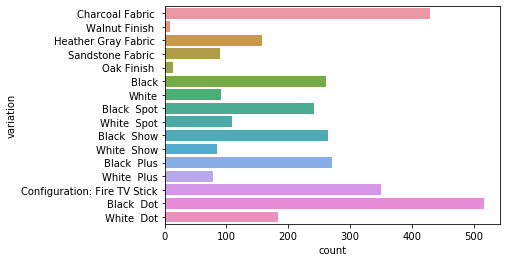

In [31]:
ax = sns.countplot(y="variation", data=data)

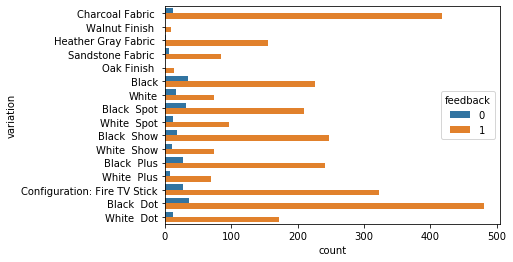

In [32]:
ax = sns.countplot(y="variation", hue="feedback", data=data)

In [8]:
data.drop(['rating','date','variation'], axis = 1,inplace=True)

In [9]:
df = pd.read_csv('scraped_data1.csv')
df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
df['rating']=df['stars'].str[0]
df['rating'].astype(int)
df['feedback']=[0 if x <'3' else 1 for x in df['rating']]
df.rename(columns={'comment':'verified_reviews'},inplace = True)

In [10]:
df1=df[df['rating']<'3']

In [11]:
df1.drop(['stars','rating'], axis = 1, inplace=True)

C:\Users\arvak\Anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df1.reset_index(drop=True,inplace=True)

In [12]:
df1.head()

,verified_reviews,feedback
0,It definitely has better speakers th...,0
1,Worst software!!! Not even 50% of an...,0
2,Rate of speech cannot be altered. Sp...,0
3,This device does not have integratio...,0
4,It definitely has better speakers th...,0


In [13]:
df1.shape

(2396, 2)

In [13]:
fdf = pd.concat([data, df1], ignore_index=True)

In [14]:
fdf.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [16]:
fdf.shape

(5546, 2)

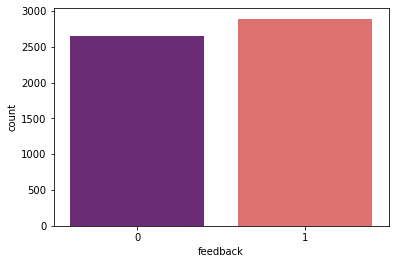

In [16]:
sns.countplot(x='feedback',data=fdf,palette='magma')

In [17]:
fdf['Review_count'] = fdf['verified_reviews'].str.len()

In [18]:
fdf.head()

,verified_reviews,feedback,Review_count
0,Love my Echo!,1,13
1,Loved it!,1,9
2,"Sometimes while playing a game, you can answer...",1,195
3,I have had a lot of fun with this thing. My 4 ...,1,172
4,Music,1,5


In [19]:
fdf['Review_count'].max()

2851

In [ ]:
fdf[fdf['Review_count']==2851]['verified_reviews'].iloc[0]

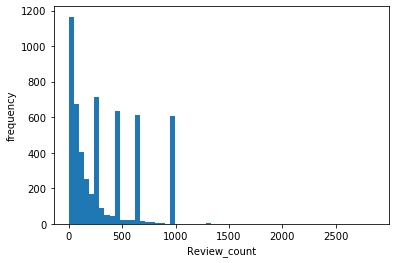

In [20]:
plt.hist('Review_count',bins=60,data=fdf)
plt.xlabel('Review_count')
plt.ylabel('frequency')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000222802E7A90>,
      dtype=object)

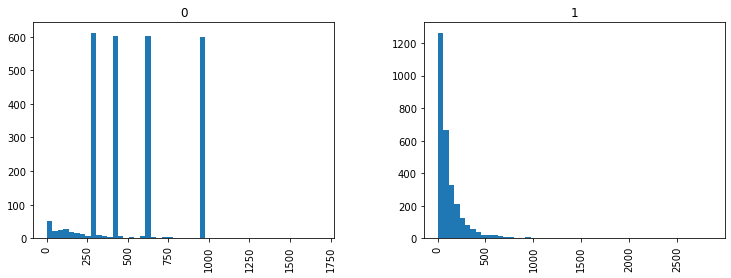

In [21]:
fdf.hist(column='Review_count', by='feedback', bins=50,figsize=(12,4))

In [15]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
import string
import re
from nltk.tokenize import word_tokenize

In [141]:
####remove
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [21]:
def text_preprocess(mess):
    no_punc = [char for char in mess if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('English')]
    

In [16]:
# with out using split method 2
def text_preprocess(mess):
    no_punc = [char for char in mess if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    no_spl_char = re.sub("[^A-Za-z]+"," ",no_punc)
    no_URL = re.sub(r'https?:\/\/\S*', '', no_spl_char)
    #no_singlechar = [i for i in no_URL if len(i) > 1]
    
    return [word for word in word_tokenize(no_URL) if len(word)>1 if word.lower() not in stopwords.words('English')]

In [17]:
fdf['verified_reviews']=fdf['verified_reviews'].apply(text_preprocess)

In [18]:
fdf.head(10)

,verified_reviews,feedback
0,"[Love, Echo]",1
1,[Loved],1
2,"[Sometimes, playing, game, answer, question, c...",1
3,"[lot, fun, thing, yr, old, learns, dinosaurs, ...",1
4,[Music],1
5,"[received, echo, gift, needed, another, Blueto...",1
6,"[Without, cellphone, use, many, features, iPad...",1
7,"[think, th, one, Ive, purchased, Im, working, ...",1
8,"[looks, great]",1
9,"[Love, listened, songs, heard, since, childhoo...",1


In [ ]:
fdf['verified_reviews'].loc[6]

In [19]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer =WordNetLemmatizer()
def lemmatize_text(token_text):
    text = [lemmatizer.lemmatize(word) for word in token_text]
    return text

In [20]:
fdf['verified_reviews']=fdf['verified_reviews'].apply(lambda x: lemmatize_text(x))

In [21]:
fdf.head()

,verified_reviews,feedback
0,"[Love, Echo]",1
1,[Loved],1
2,"[Sometimes, playing, game, answer, question, c...",1
3,"[lot, fun, thing, yr, old, learns, dinosaur, c...",1
4,[Music],1


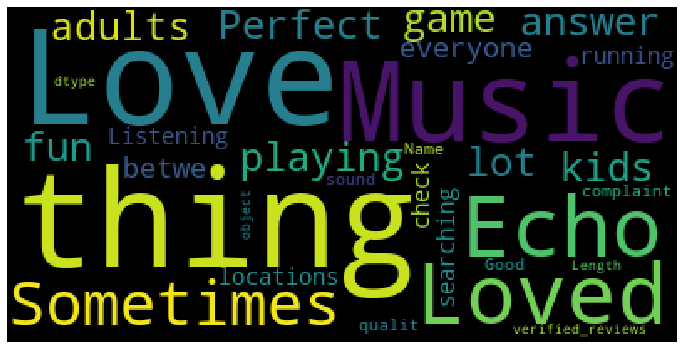

In [28]:
text = str(data['verified_reviews'])
wordcloud = WordCloud().generate(text)
fig=plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

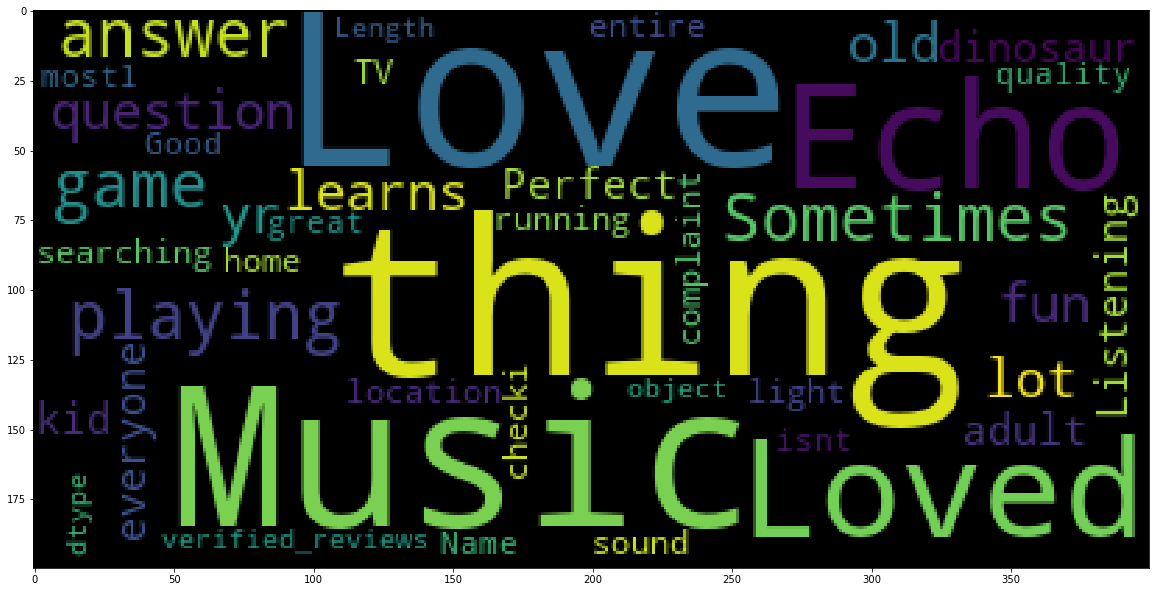

In [30]:
text = str(data['verified_reviews'])
plt.figure(figsize=(20,200))
wc=WordCloud().generate((text)) 
plt.imshow(wc)

In [44]:
bow = pd.DataFrame(data=fdf,columns=['verified_reviews','feedback'])

In [45]:
bow['verified_reviews']=[tuple(x) for x in bow['verified_reviews']]

In [46]:
bow.head()

,verified_reviews,feedback
0,"(Love, Echo)",1
1,"(Loved,)",1
2,"(Sometimes, playing, game, answer, question, c...",1
3,"(lot, fun, thing, yr, old, learns, dinosaur, c...",1
4,"(Music,)",1


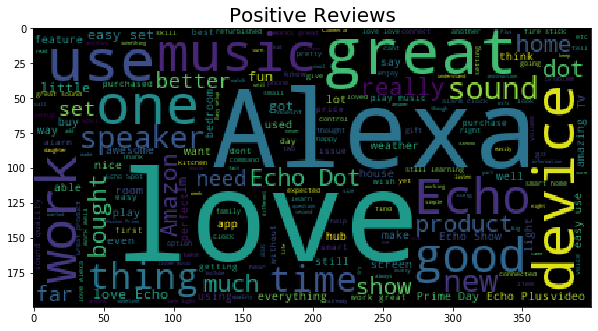

In [47]:
good=bow[bow.feedback==1].verified_reviews.unique().tolist()
good=" ".join(np.concatenate(good))
from wordcloud import WordCloud
cv=WordCloud().generate(good)
cv
plt.figure(figsize=(10,8))
plt.title('Positive Reviews',size=20)
plt.imshow(cv)
#data = ' '.join(np.concatenate(df.col2))

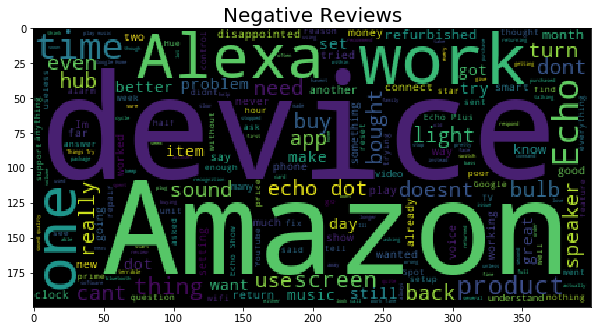

In [53]:
bad=bow[bow.feedback==0].verified_reviews.unique().tolist()
bad=" ".join(np.concatenate(bad))
from wordcloud import WordCloud
cv=WordCloud().generate(bad)
cv
plt.figure(figsize=(10,8))
plt.title('Negative Reviews',size=20)
plt.imshow(cv)
#data = ' '.join(np.concatenate(df.col2))

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(tokenizer=lambda i:i, lowercase=False)
X = tfidf.fit_transform(fdf['verified_reviews'])
y=fdf.iloc[:,1].values
print(tfidf.get_feature_names())

In [79]:
#method 1 need to delete
def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    
    tokenizer=dummy_fun,
    preprocessor=dummy_fun
    ) 

In [ ]:
# sample need to delete
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVect=TfidfVectorizer(max_features=1500,preprocessor=None,
    tokenizer=None,)

X=tfidfVect.fit_transform(data['verified_reviews']).toarray()


In [64]:
X.shape

(5546, 4573)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train,y_train)
print(MultiNB)
y_pred = MultiNB.predict(X_test)

MultinomialNB()


In [61]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
#print(classification_report(y_test,y_pred))
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Precision Score',precision_score(y_test,y_pred))
print('Recall Score',recall_score(y_test,y_pred))
#print('\n')
#print('\n')
#print('F1 Score',f1_score(y_test,y_pred))

Accuracy Score 0.9489182692307693
Precision Score 0.9161220043572985
Recall Score 0.9905771495877503


In [62]:
from sklearn.svm import SVC
svm1=SVC(probability=True)
svm1.fit(X_train,y_train)
pred_2=svm1.predict((X_test))
score_2=accuracy_score(y_test,pred_2)
print("Accuracy for svm:\t"+str(score_2))
print("Precision for svm:\t"+str(precision_score(y_test,pred_2)))
print("Recall for svm:\t"+str(recall_score(y_test,pred_2)))

Accuracy for svm:	0.9597355769230769
Precision for svm:	0.9268558951965066
Recall for svm:	1.0


In [47]:
from sklearn import metrics
m_confusion_test = metrics.confusion_matrix(y_test, pred_2)
print('Support Vector Machine')
pd.DataFrame(data = m_confusion_test, columns = ['Predicted Neg', 'Predicted Pos'],
            index = ['Actual Neg', 'Actual Pos'])

Support Vector Machine


,Predicted Neg,Predicted Pos
Actual Neg,748,67
Actual Pos,0,849


C:\Users\arvak\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\arvak\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


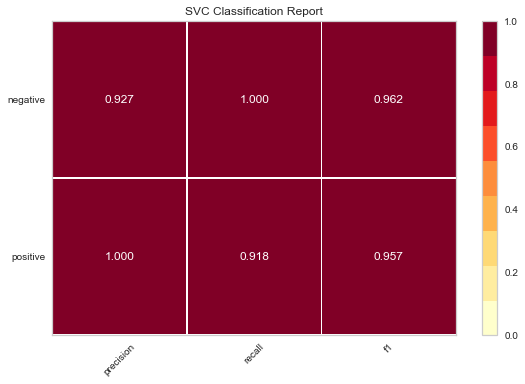

In [41]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svm, classes=['positive','negative'])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof()

In [36]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=200, max_features="auto")
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test,y_pred1)
print("Accuracy for RandomForest:\t"+str(accuracy1))
print("Precision for RandomForest:\t"+str(precision_score(y_test,y_pred1)))
print("Recall for RandomForest:\t"+str(recall_score(y_test,y_pred1)))

Accuracy for RandomForest:	0.9627403846153846
Precision for RandomForest:	0.9319429198682766
Recall for RandomForest:	1.0


In [50]:
from sklearn import metrics
m_confusion_test = metrics.confusion_matrix(y_test, y_pred)
print('Naive Bayes Classification')
pd.DataFrame(data = m_confusion_test, columns = ['Predicted Neg', 'Predicted Pos'],
            index = ['Actual Neg', 'Actual Pos'])



Naive Bayes Classification


,Predicted Neg,Predicted Pos
Actual Neg,738,77
Actual Pos,8,841


In [51]:
m_confusion_test1 = metrics.confusion_matrix(y_test, pred_2)
print('Support Vector Machine')
pd.DataFrame(data = m_confusion_test1, columns = ['Predicted Neg', 'Predicted Pos'],
            index = ['Actual Neg', 'Actual Pos'])

Support Vector Machine


,Predicted Neg,Predicted Pos
Actual Neg,748,67
Actual Pos,0,849


In [52]:
m_confusion_test2 = metrics.confusion_matrix(y_test, y_pred1)
print('Random forest')
pd.DataFrame(data = m_confusion_test2, columns = ['Predicted Neg', 'Predicted Pos'],
            index = ['Actual Neg', 'Actual Pos'])

Random forest


,Predicted Neg,Predicted Pos
Actual Neg,753,62
Actual Pos,0,849


In [63]:

r_probs = [0 for _ in range(len(y_test))]
rf_probs = model1.predict_proba(X_test)
nb_probs = MultiNB.predict_proba(X_test)
svm_probs = svm1.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
svm_probs = svm_probs[:, 1]

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score

In [66]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svm_auc=roc_auc_score(y_test, svm_probs)


In [67]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('SVM: AUROC = %.3f' % (svm_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.992
Naive Bayes: AUROC = 0.970
SVM: AUROC = 0.989


In [69]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

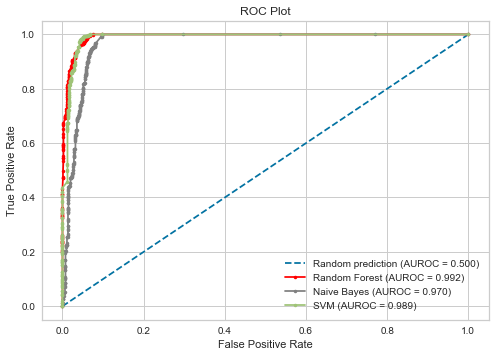

In [75]:

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.',color='red', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.',color='gray', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()